# Regresión Lineal Mútliple

Dependencia de más de una variable.

Salario = Educación + Nacionalidad + Experiencia + Idiomas
Precio de una casa = Locación + Tamaño + Edad
GPA = SAT + Género + Estado Marital
<br>
Entre más variables, más factores se consideran del problema.
<br>
La regresión múltiple siempre es mejor que la regresión lineal, con cada variable agregada se incrementa el poder explicativo del modelo.

## Ecuación de Regresión Múltiple
$\hat{y} = b_0 + b_1 x_1 + b_2x_2 + ... + b_kx_k$
<br>
donde:
<br>
$\hat{y}$: variable dependiente
$b_0$: intersección 
<br>
$\{x_1, x_2, ..., x_n\}$: variables independientes
<br>
$\{b_1, b_2, ..., b_k\}$: coeficientes correspondientes

## $\bar{R}^2$ Ajustada
$R^2$ mide la cantidad de variabilidad total explicada en el modelo.
<br>
$\bar{R}^2 < R^2$ 
<br>
La $R^2$ ajustada penaliza el uso excesivo de variables.

## Ejemplo

In [37]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [38]:
# Cargar datos
# SAT: calificacion de estudiantes de preparatoria: Escritura, Lectura y Matematicas
# Se considera uno de los mejores estimadores de capacidad intelectual
# GPA: promedio al salir de la universidad
#
# La columna RAND asigna valores (1,2,3) de manera aleatoria
# Sabemos que la variable RAND no esta relacionada con la variable GPA
#
# GPA = b0 + b1*SAT + b2*RAND
data = pd.read_csv('Multiple linear regression.csv')
print(data.head(n=5))

    SAT   GPA  Rand 1,2,3
0  1714  2.40           1
1  1664  2.52           3
2  1760  2.54           3
3  1685  2.74           3
4  1693  2.83           2


In [39]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [40]:
y = data["GPA"]
x1 = data[["SAT","Rand 1,2,3"]]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.58e-10
Time:                        20:15:36   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.4

$R^2$ creció ligeramente, mientras que Adj. R-squared decreció.
<br>
Se penalizó agregar una variable adicional que no tiene un fuerte poder explicativo en el modelo.
<br>
<br>
Además, el p-value de la variable Rand es 0.762 >> 0.05, lo cual no permite rechazar la hipótesis nula.
<br>
Entonces, la variable Rand es insignificante y baja el desempeño del poder explicativo del modelo así que debe ser eliminada.
<br>
Podemos agregar 100 variables al modelo y aun asi la regresión será mala. Es mejor usar la menor cantidad de variables. La simplicidad es mejor que un alto poder explicativo en el modelo.

$\bar{R}^2$ sirve para comparar modelos.
<br>
Es necesario:
    <ul>
    <li> Mismo dataset </li>
    <li> Misma variable dependiente </li>
    </ul>

# F-statistic
F-statistic sigue la F-distribution.
<br>
Se utiliza para mostrar la importancia general del modelo. 
<br>
F-test:
<ul>
    <li> Ho: b1=b2=...=bk=0 </li>
    <li> H1: al menos una $bi \neq 0$ </li>
    </ul>
        

En el ejemplo, la F-statistic es 56.05 y su p-value es casi 0.
<br>
Entonces, el modelo en general si es significativo.
<br>
Entre más pequeña sea F-statistic, es menos significativo el modelo.

## Supuestos de la Regresión Lineal
<ul>
    <li> Linearidad </li>
    <li> No endogeneidad: covarianza del error es 0 </li>
    <li> Normalidad y homoscedaticidad: el error tiene una distribución normal y varianza constante. </li>
    <li> No autocorrelación: la covarianza entre los errores es 0. </li>
    <li> No multicolinearidad: alta colinearidad entre variables </li>
    </ul>

### Linearidad
Debe existir una relación lineal entre las variables dependiente e independiente.
Hay varias formas de solucionarlo:
<ul>
    <li> Transformación Exponencial </li>
    <li> Transformación logaritmica </li>
    </ul>

### No endogeneidad de los regresores
No existe una correlación entre las variables independientes y los errores.
<br>
Este problema se llama Sesgo de variables omitidas.
<br>
Ocurre cuando no se incluye una variable relevante. Cada variable independiente explica el cómo esta relacionada con la variable dependiente. También la variable dependiente se explica por la variable omitida.
<br>
Toda variable omitida se convierte en error, entonces las variables independientes y la omitida estan correlacionadas.
La Endogeneidad ocurre cuando hay una correlación entre la variable X y el término de error en el modelo.
<br>
El término de error en el modelo se debe a todas las cosas en la variable dependiente que no se deben a las variables que tiene en su modelo.
Entonces, en el sentido más amplio, surge un problema de endogeneidad cuando hay algo que
relacionada con su variable Y que también está relacionada con su variable X, y no tiene eso
algo en tu modelo. 
La endogeneidad puede ser causada por variables omitidas.
<br>
Por ejemplo, queremos explicar el salario y usamos años de escolaridad como una covariable. 
Los años de escolaridad se correlacionan con la variable no observada de ética laboral.

### Normalidad y homoscedasticidad
Normalidad: suponemos que el error tiene una distribución normal
<br>
La media debe ser cero: la constante de intersección debe ser diferente de 0.
<br>
Homoscedasticidad: significa que los errores deben tener igual varianza. 
Ejemplo de heteroscedasticidad
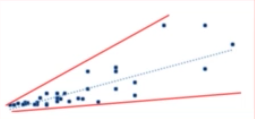

Por ejemplo, una persona pobre tiene una baja variabilidad en su gasto en comida; siempre come huevos y papas. Mientras que una persona adierada tiene una alta variabilidad en su gasto de comida; un dia va a un restaurante caro y otros come barato en casa.
<br>
Formas de ajustar: Usar escala logaritmica, eliminar valores atipicos.

### No Autocorrelation
No correlación seriada. Los errores no estan correlacionados.
<br>
Es común en series de tiempo. Por ejemplo el Efecto Day-Of-the-week en finanzas.
<br>
Una forma de detectar correlación es encontrando patrones en la grafica de residuos.
<br>
Otra forma es revisar la prueba de Durbin-Watson dentro de la tabla de resultados. Valores <1 y >3 indican autocorrelación.
<br> 
No hay remedio para la autocorrelación.

### No Multicolinearidad
Dos o mas variables tienen una alta correlación.
<br>
Si puedes representar una variable usando otra, entonces utiliza solo una para el modelo.
<br> Se puede detectar revisando los p-value en la tabla de resultados.